In [1]:
from glob import glob
import sys
import getpass
import os
from os.path import join, dirname, getsize
import pickle
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

import nilearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate, GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/usr/local/anaconda3/envs/sampark/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
GA = mydef.GA()

Google Drive is detected!
Git directory is detected!


## 1. ROI list

In [3]:
## initalizing
GA.roi_imgs = {}

- Localizer

In [3]:
suffix = '7localizers'
path_list = sorted(glob(join(GA.dir_mask,'localizer','n200_*.nii')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    GA.roi_imgs[roi] = nilearn.image.load_img(path)
GA.roi_imgs

{'n200_c1-1_L_M1': <nibabel.nifti1.Nifti1Image at 0x7fad19654d10>,
 'n200_c1-2_L_S1': <nibabel.nifti1.Nifti1Image at 0x7fad19654cd0>,
 'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fad19654f50>,
 'n200_c1_R_SPL': <nibabel.nifti1.Nifti1Image at 0x7fad19669090>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7fad19669350>,
 'n200_c2_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fad19669590>,
 'n200_c3_R_MTG': <nibabel.nifti1.Nifti1Image at 0x7fad196697d0>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fad19669990>,
 'n200_c4_L_IFG': <nibabel.nifti1.Nifti1Image at 0x7fad19669bd0>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7fad19669d90>,
 'n200_c5_L_SPL': <nibabel.nifti1.Nifti1Image at 0x7fad19669c90>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7fad19674190>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7face87769d0>,
 'n200_c6_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fad19674510>,
 'n200_c7_L_Thalamus': <nibabel

In [4]:
key_list = ['n200_c1_L_Postcentral'
            , 'n200_c2_R_CerebellumIV-V'
            , 'n200_c3_R_Postcentral'
            , 'n200_c4_L_Putamen'
            , 'n200_c5_R_SMA'
            , 'n200_c6_R_CerebellumVIIIb'
            , 'n200_c7_L_Thalamus']
temp = {}
for key in key_list:
    temp[key] = GA.roi_imgs[key]
GA.roi_imgs = temp
GA.roi_imgs

{'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fad19654f50>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7fad19669350>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fad19669990>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7fad19669d90>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7fad19674190>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7face87769d0>,
 'n200_c7_L_Thalamus': <nibabel.nifti1.Nifti1Image at 0x7fad196742d0>}

- DMN

In [3]:
suffix = 'DMN'

## DMN regions(global)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_dmn, name+'.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)
        
# ## DMN regions(detail)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_dmn, name+'_*.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)

GA.roi_imgs

{'Core': <nibabel.nifti1.Nifti1Image at 0x7fdaa8474c90>,
 'dMsub': <nibabel.nifti1.Nifti1Image at 0x7fdad833e550>,
 'MTLsub': <nibabel.nifti1.Nifti1Image at 0x7fdaa90effd0>,
 'Core_PCC_r': <nibabel.nifti1.Nifti1Image at 0x7fdaa90f7150>,
 'Core_aMPFC_l': <nibabel.nifti1.Nifti1Image at 0x7fdaa90f7490>,
 'Core_PCC_l': <nibabel.nifti1.Nifti1Image at 0x7fdaa90f7710>,
 'Core_aMPFC_r': <nibabel.nifti1.Nifti1Image at 0x7fdaa90f7910>,
 'dMsub_TempP_r_temp': <nibabel.nifti1.Nifti1Image at 0x7fdaa90f7990>,
 'dMsub_dMPFC': <nibabel.nifti1.Nifti1Image at 0x7fdaa90f7d50>,
 'dMsub_TempP_l_temp': <nibabel.nifti1.Nifti1Image at 0x7fdaa90f7a10>,
 'dMsub_TPJ_l': <nibabel.nifti1.Nifti1Image at 0x7fdaa90fe1d0>,
 'dMsub_LTC_l': <nibabel.nifti1.Nifti1Image at 0x7fdaa90fe450>,
 'dMsub_TPJ_r': <nibabel.nifti1.Nifti1Image at 0x7fdaa90fe690>,
 'dMsub_LTC_r': <nibabel.nifti1.Nifti1Image at 0x7fdaa90fe8d0>,
 'MTLsub_HF_r': <nibabel.nifti1.Nifti1Image at 0x7fdaa90fea90>,
 'MTLsub_PHC_r': <nibabel.nifti1.Nifti1Image

- Yeo's network #1

In [3]:
GA.load_fan()

## yeo_17network == 1
suffix = 'Yeo1'
dt = pd.DataFrame()
for nn in [1]:
    dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
for idx in dt.index:
    nn = dt.loc[idx,'label']
    region = dt.loc[idx,'region']
    GA.roi_imgs[region] = GA.fan_imgs[str(nn)]
GA.roi_imgs

{'FuG_L_3_2': <nibabel.nifti1.Nifti1Image at 0x7feb092bcad0>,
 'FuG_R_3_2': <nibabel.nifti1.Nifti1Image at 0x7feb092bc850>,
 'MVOcC_L_5_1': <nibabel.nifti1.Nifti1Image at 0x7feb1d8b4590>,
 'MVOcC_R_5_1': <nibabel.nifti1.Nifti1Image at 0x7feb1d8b4310>,
 'MVOcC_L_5_3': <nibabel.nifti1.Nifti1Image at 0x7feb1d8adb50>,
 'MVOcC_R_5_3': <nibabel.nifti1.Nifti1Image at 0x7feb1d8ad8d0>,
 'MVOcC_R_5_4': <nibabel.nifti1.Nifti1Image at 0x7feb1d8ad3d0>,
 'LOcC_L_4_1': <nibabel.nifti1.Nifti1Image at 0x7feb1acc5c10>,
 'LOcC_R_4_1': <nibabel.nifti1.Nifti1Image at 0x7feb1acc5990>,
 'LOcC_L_4_3': <nibabel.nifti1.Nifti1Image at 0x7feb1acc5110>,
 'LOcC_R_4_3': <nibabel.nifti1.Nifti1Image at 0x7feb1acc5090>,
 'LOcC_L_4_4': <nibabel.nifti1.Nifti1Image at 0x7feb1acbfcd0>,
 'LOcC_R_4_4': <nibabel.nifti1.Nifti1Image at 0x7feb1acbfa50>,
 'LOcC_L_2_2': <nibabel.nifti1.Nifti1Image at 0x7feb1acbf290>}

- Ventral visual stream (TT_Daemon, Brodmann Area)

In [ ]:
path_list = glob(join(GA.dir_mask, 'TT_Daemon', '*.brik1.BA???.*.nii.gz'))
for path in path_list:
    temp = path.split('/')[-1].replace('.nii.gz', '')
    fname = temp.split('.')[2]
    GA.roi_imgs[fname] = nilearn.image.load_img(path)
GA.roi_imgs

#### *Visualization ROIs (optional)

0

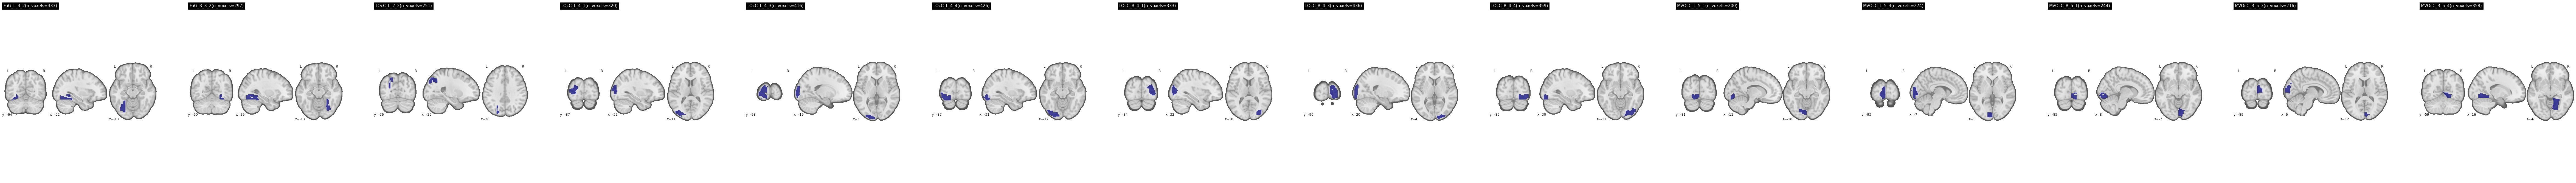

In [4]:
GA.plot_rois()

## *2. Calculation (run once)

In [8]:
for subj in GA.list_subj:
    for stage in GA.list_stage:
        GA.cross_valid(GA.load_beta(subj, stage))

In [9]:
## save the result as a pickle file
GA.save_as_pkl(path=GA.dir_script, data=GA.scores, suffix=suffix)

## 3. Loading a previous result

In [5]:
GA.show_pkl_list(path=GA.dir_script, word='decacc.%s'%suffix)

,name,identity
0,./20210714_decacc.7localizers.pkl,a


In [6]:
decacc = GA.load_from_pkl(fname='./20210714_decacc.%s.pkl'%suffix)

In [7]:
GA.make_df_score(fname='./20210714_decacc.%s.pkl'%suffix)

,subj,stage,ROI,mean_accuracy
0,01,early_practice,n200_c1_L_Postcentral,0.378472
1,01,early_practice,n200_c2_R_CerebellumIV-V,0.260417
2,01,early_practice,n200_c3_R_Postcentral,0.312500
3,01,early_practice,n200_c4_L_Putamen,0.260417
4,01,early_practice,n200_c5_R_SMA,0.336806
...,...,...,...,...
835,44,late_unpractice,n200_c3_R_Postcentral,0.288194
836,44,late_unpractice,n200_c4_L_Putamen,0.319444
837,44,late_unpractice,n200_c5_R_SMA,0.250000
838,44,late_unpractice,n200_c6_R_CerebellumVIIIb,0.277778


## 4. Plotting the decoding accuracy

0

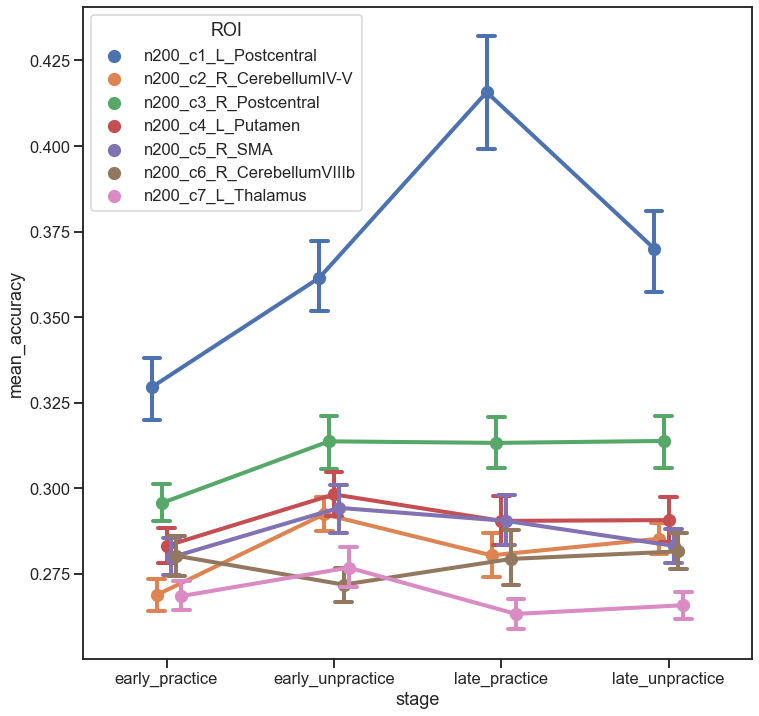

In [8]:
plt.figure(figsize=(12,12))
GA.plot_score()

0

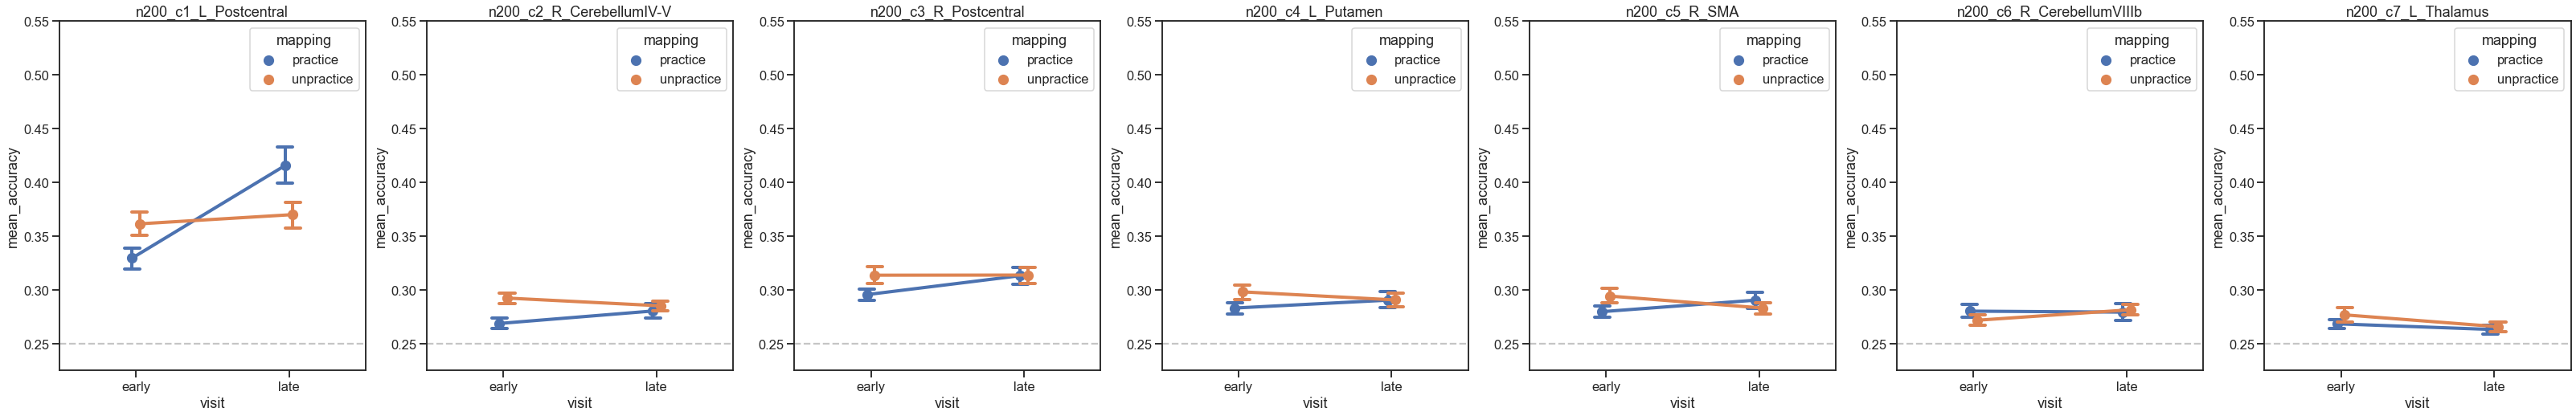

In [9]:
GA.plot_decacc(figsize=(8,8), ylim=(.225, .55), hline=.25)
# plt.savefig(join(GA.dir_git,'GA','images',"%s_decacc.%s.png"%(GA.today, suffix)))

0

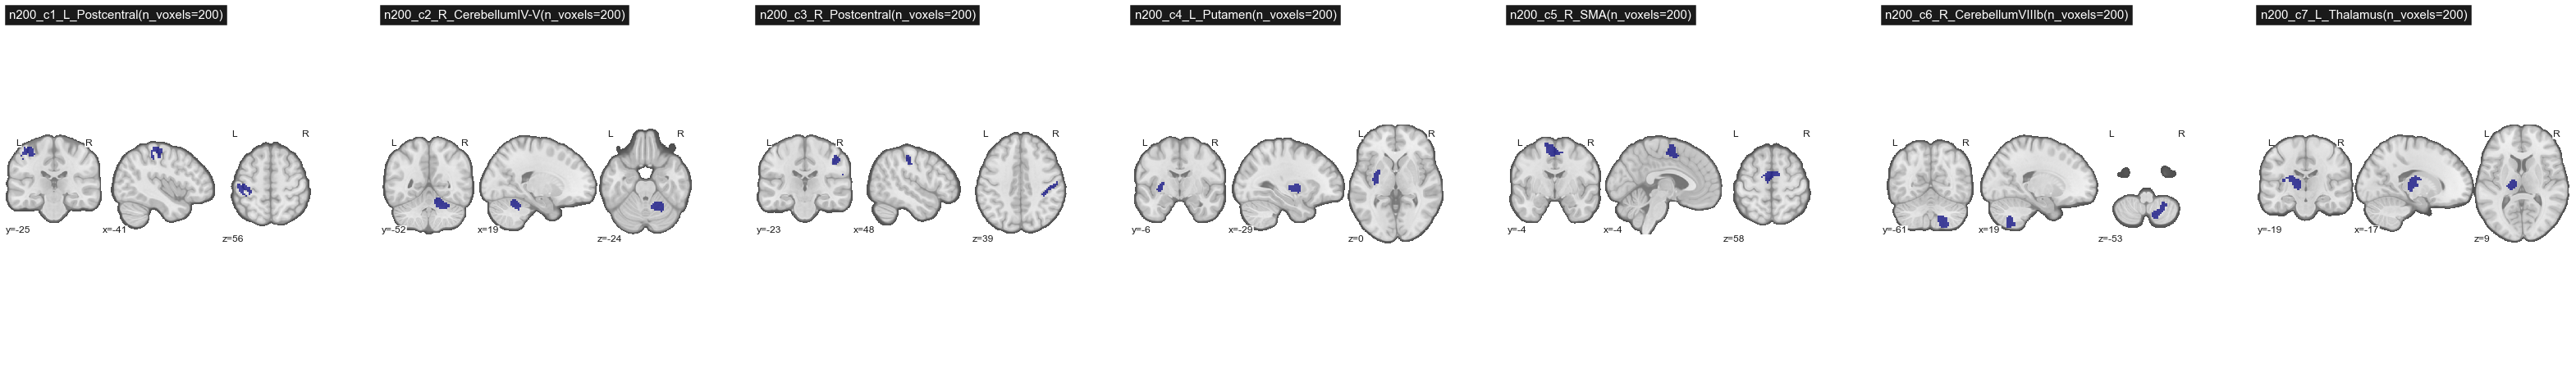

In [10]:
GA.plot_rois(figsize=(8,8))
# plt.savefig(join(GA.dir_git,'GA','images',"%s_rois.%s.png"%(GA.today, suffix)))

## 5. t-test

In [11]:
GA.do_paired_ttest(cond_A='early_practice', cond_B='late_practice', alpha=.005)

,ROI,cond_A,cond_B,tval,Two-sided p-value,rejected,pval-corrected
0,n200_c1_L_Postcentral,early_practice,late_practice,-4.574044,0.000083,True,0.000083
1,n200_c2_R_CerebellumIV-V,early_practice,late_practice,-1.865849,0.072207,False,0.072207
2,n200_c3_R_Postcentral,early_practice,late_practice,-1.926143,0.063940,False,0.063940
3,n200_c4_L_Putamen,early_practice,late_practice,-0.863909,0.394728,False,0.394728
4,n200_c5_R_SMA,early_practice,late_practice,-1.338056,0.191276,False,0.191276
5,n200_c6_R_CerebellumVIIIb,early_practice,late_practice,0.097040,0.923362,False,0.923362
6,n200_c7_L_Thalamus,early_practice,late_practice,0.832935,0.411689,False,0.411689


In [12]:
GA.do_paired_ttest(cond_A='early_unpractice', cond_B='late_unpractice', alpha=.005)

,ROI,cond_A,cond_B,tval,Two-sided p-value,rejected,pval-corrected
0,n200_c1_L_Postcentral,early_unpractice,late_unpractice,-0.554254,0.583654,False,0.583654
1,n200_c2_R_CerebellumIV-V,early_unpractice,late_unpractice,1.091695,0.283954,False,0.283954
2,n200_c3_R_Postcentral,early_unpractice,late_unpractice,-0.011255,0.991097,False,0.991097
3,n200_c4_L_Putamen,early_unpractice,late_unpractice,0.903051,0.373939,False,0.373939
4,n200_c5_R_SMA,early_unpractice,late_unpractice,1.150131,0.259486,False,0.259486
5,n200_c6_R_CerebellumVIIIb,early_unpractice,late_unpractice,-1.560546,0.129479,False,0.129479
6,n200_c7_L_Thalamus,early_unpractice,late_unpractice,1.529318,0.137021,False,0.137021


In [13]:
GA.do_1sample_ttest(stage='early_practice', mean=.25, alpha=.005)

,ROI,stage,tval,pval_uncorrected,rejected,pval_corrected
0,n200_c1_L_Postcentral,early_practice,8.703611,1.394858e-09,True,1.394858e-09
1,n200_c2_R_CerebellumIV-V,early_practice,3.806147,6.754291e-04,True,6.754291e-04
2,n200_c3_R_Postcentral,early_practice,9.022293,6.455393e-10,True,6.455393e-10
3,n200_c4_L_Putamen,early_practice,6.371906,5.772277e-07,True,5.772277e-07
4,n200_c5_R_SMA,early_practice,5.639728,4.297449e-06,True,4.297449e-06
5,n200_c6_R_CerebellumVIIIb,early_practice,5.129903,1.767790e-05,True,1.767790e-05
6,n200_c7_L_Thalamus,early_practice,4.464133,1.121099e-04,True,1.121099e-04
